In [2]:
 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data = pd.read_csv('ev_data_chat.csv')

data.head(15)

,CustomerID,City,State,Age,Income,Occupation,EnvironmentalConcern,TechSavvy,VehicleType,CurrentVehicleType,DailyCommuteDistance,InterestInEV,ChargingStationAvailability,GovernmentIncentives
0,1,Delhi,Delhi,30,1000000,Tech Employee,High,High,Car,Petrol,20,Yes,High,Yes
1,2,Mumbai,Maharashtra,45,800000,Business Owner,Medium,Medium,Car,Diesel,15,Yes,Medium,Yes
2,3,Bengaluru,Karnataka,28,700000,Professional,High,High,Bike,Petrol,10,Yes,High,Yes
3,4,Pune,Maharashtra,35,600000,Professional,Low,High,Car,Petrol,25,No,Low,Yes
4,5,Hyderabad,Telangana,50,1500000,Business Owner,Medium,Low,Car,Diesel,30,No,Medium,Yes
5,6,Chennai,Tamil Nadu,40,900000,Tech Employee,High,Medium,Car,Petrol,20,Yes,High,No
6,7,Delhi,Delhi,33,1200000,Professional,High,High,Bike,Petrol,5,Yes,High,Yes
7,8,Mumbai,Maharashtra,27,500000,Student,High,High,Bike,Petrol,10,Yes,Medium,Yes
8,9,Bengaluru,Karnataka,32,1100000,Tech Employee,Medium,High,Car,Diesel,20,Yes,High,Yes
9,10,Pune,Maharashtra,38,850000,Professional,Low,Medium,Car,Petrol,25,No,Low,Yes


In [4]:
data.isnull().sum()

CustomerID                     0
City                           0
State                          0
Age                            0
Income                         0
Occupation                     0
EnvironmentalConcern           0
TechSavvy                      0
VehicleType                    0
CurrentVehicleType             0
DailyCommuteDistance           0
InterestInEV                   0
ChargingStationAvailability    0
GovernmentIncentives           0
dtype: int64

In [5]:
 data.describe()


,CustomerID,Age,Income,DailyCommuteDistance
count,30.000000,30.000000,3.000000e+01,30.000000
mean,15.500000,35.500000,9.563333e+05,18.000000
std,8.803408,6.683742,2.791673e+05,7.723676
min,1.000000,26.000000,5.000000e+05,5.000000
25%,8.250000,30.250000,7.275000e+05,11.250000
50%,15.500000,34.500000,9.350000e+05,20.000000
75%,22.750000,40.000000,1.150000e+06,25.000000
max,30.000000,50.000000,1.500000e+06,30.000000


In [6]:
 # Encode categorical variables
data = pd.get_dummies(data, columns=['City', 'State', 'Occupation', 'EnvironmentalConcern', 'TechSavvy',
                                     'VehicleType', 'CurrentVehicleType', 'InterestInEV',
                                     'ChargingStationAvailability', 'GovernmentIncentives'])

# Separate features and target variable
X = data.drop(['CustomerID', 'InterestInEV_No', 'InterestInEV_Yes'], axis=1)
y = data['InterestInEV_Yes']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)
plt.show()


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_functio

In [10]:
from sklearn.feature_selection import SelectKBest, f_classif

X = data.drop(['CustomerID'], axis=1)  # Drop CustomerID as it is not a feature
y = data['InterestInEV_Yes']  # Target variable (assuming InterestInEV_Yes is the target)

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
scores = selector.scores_

feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)


                               Feature      Score
29                    InterestInEV_Yes        inf
28                     InterestInEV_No        inf
2                 DailyCommuteDistance  21.053165
19            EnvironmentalConcern_Low  20.533333
18           EnvironmentalConcern_High  19.911111
31     ChargingStationAvailability_Low  11.487179
8                            City_Pune  11.487179
21                      TechSavvy_High   9.017840
30    ChargingStationAvailability_High   7.200000
0                                  Age   7.005450
22                       TechSavvy_Low   6.304685
25                     VehicleType_Car   5.169231
24                    VehicleType_Bike   5.169231
17            Occupation_Tech Employee   5.169231
11                   State_Maharashtra   4.528053
14           Occupation_Business Owner   3.154023
5                           City_Delhi   2.800000
9                          State_Delhi   2.800000
3                       City_Bengaluru   2.196078


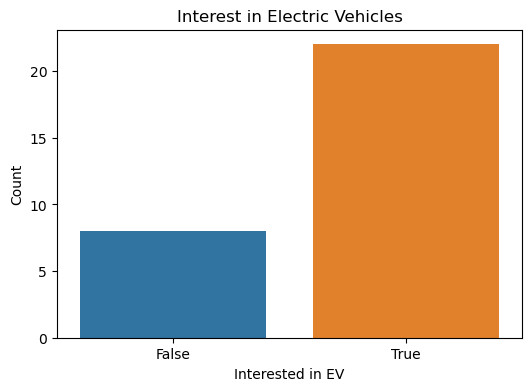

In [11]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='InterestInEV_Yes', data=data)
plt.title('Interest in Electric Vehicles')
plt.xlabel('Interested in EV')
plt.ylabel('Count')
plt.show()

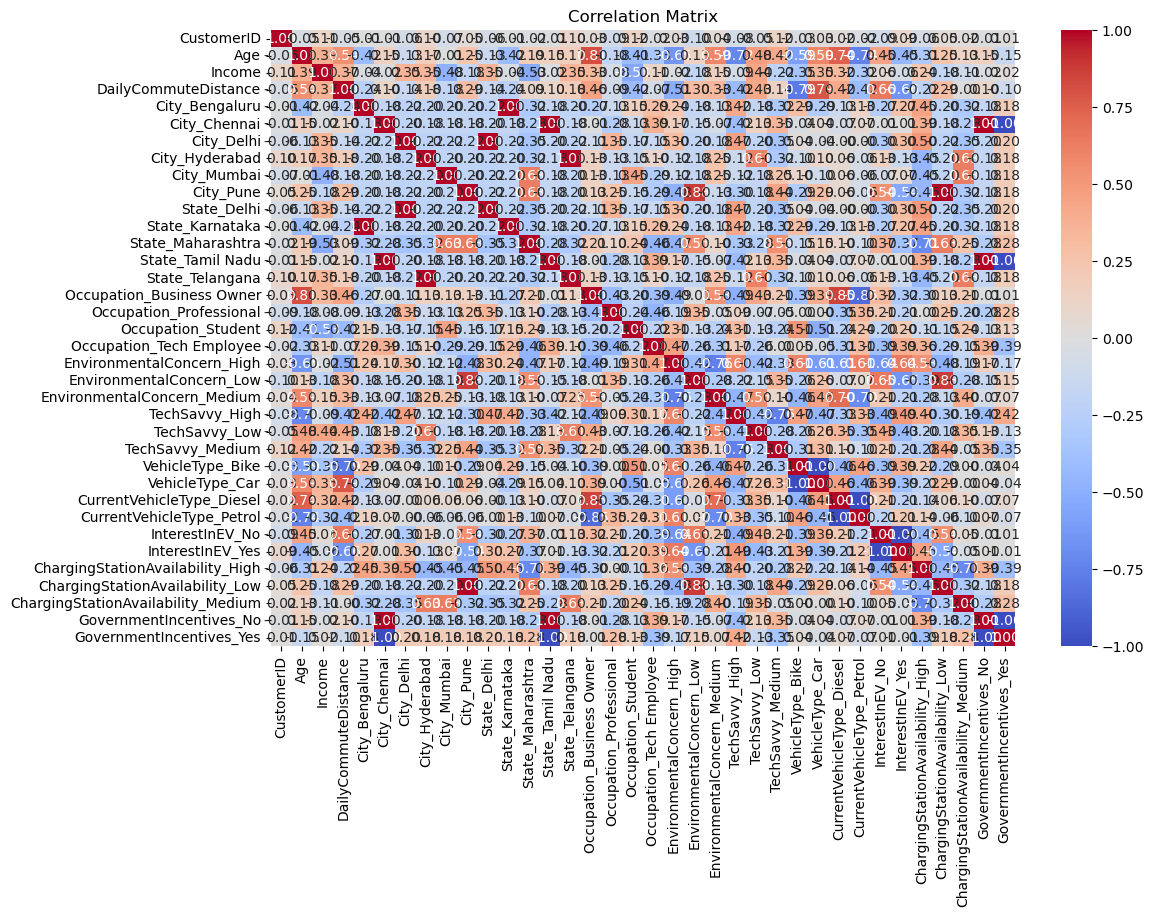

In [12]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

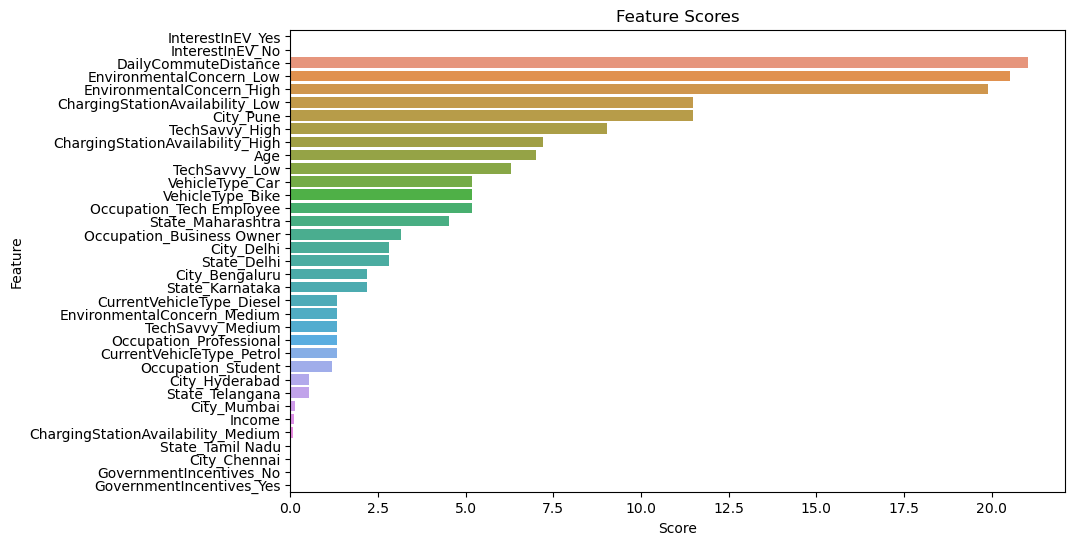

In [13]:
# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
scores = selector.scores_

feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Visualize feature scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Feature Scores')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

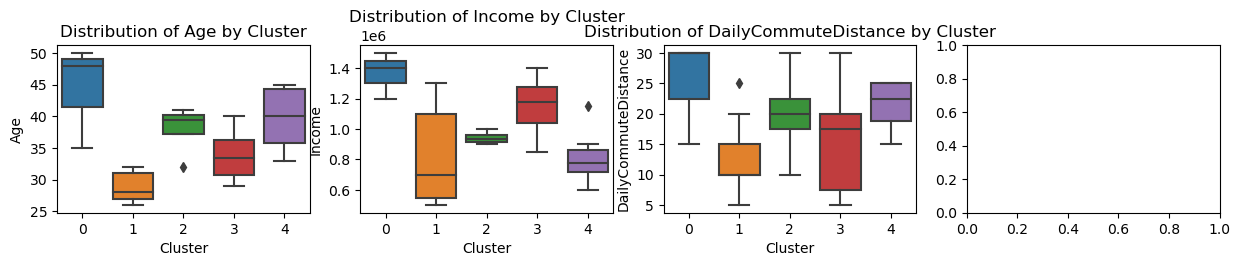

In [14]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
data['Cluster'] = kmeans.labels_

# Visualize the distribution of features across clusters
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x='Cluster', y=column, data=data)
    plt.title(f'Distribution of {column} by Cluster')
plt.tight_layout()
plt.show()


In [16]:

# Model Training for Prediction

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Model evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Visualize feature importances
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

       False       0.67      1.00      0.80         2
        True       1.00      0.86      0.92         7

    accuracy                           0.89         9
   macro avg       0.83      0.93      0.86         9
weighted avg       0.93      0.89      0.90         9



ValueError: All arrays must be of the same length

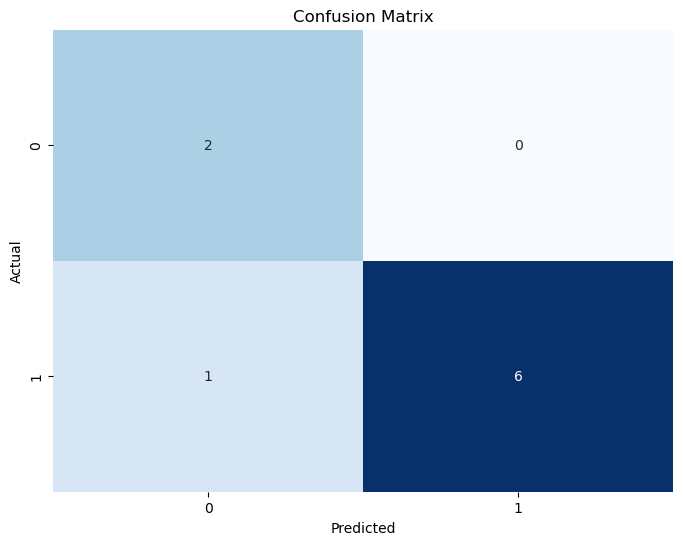

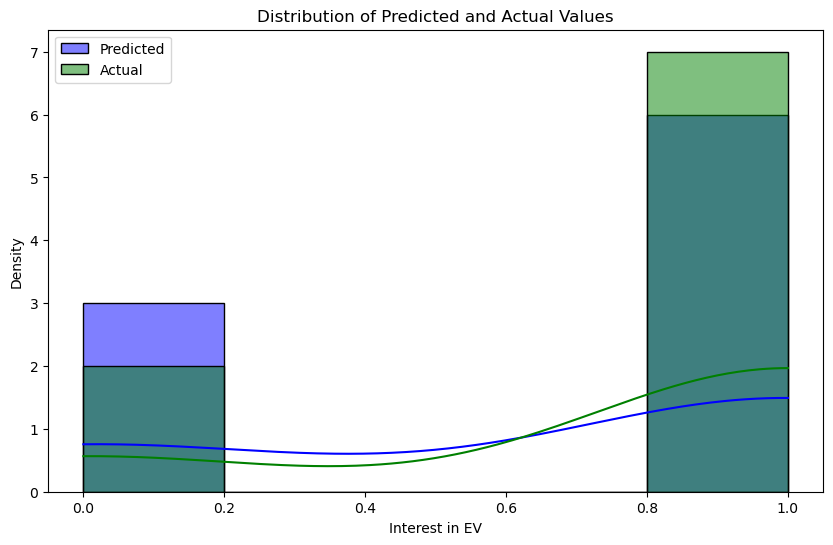

In [20]:
# Plotting confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, kde=True, color='blue', alpha=0.5, label='Predicted')
sns.histplot(y_test, kde=True, color='green', alpha=0.5, label='Actual')
plt.title('Distribution of Predicted and Actual Values')
plt.xlabel('Interest in EV')
plt.ylabel('Density')
plt.legend()
plt.show()


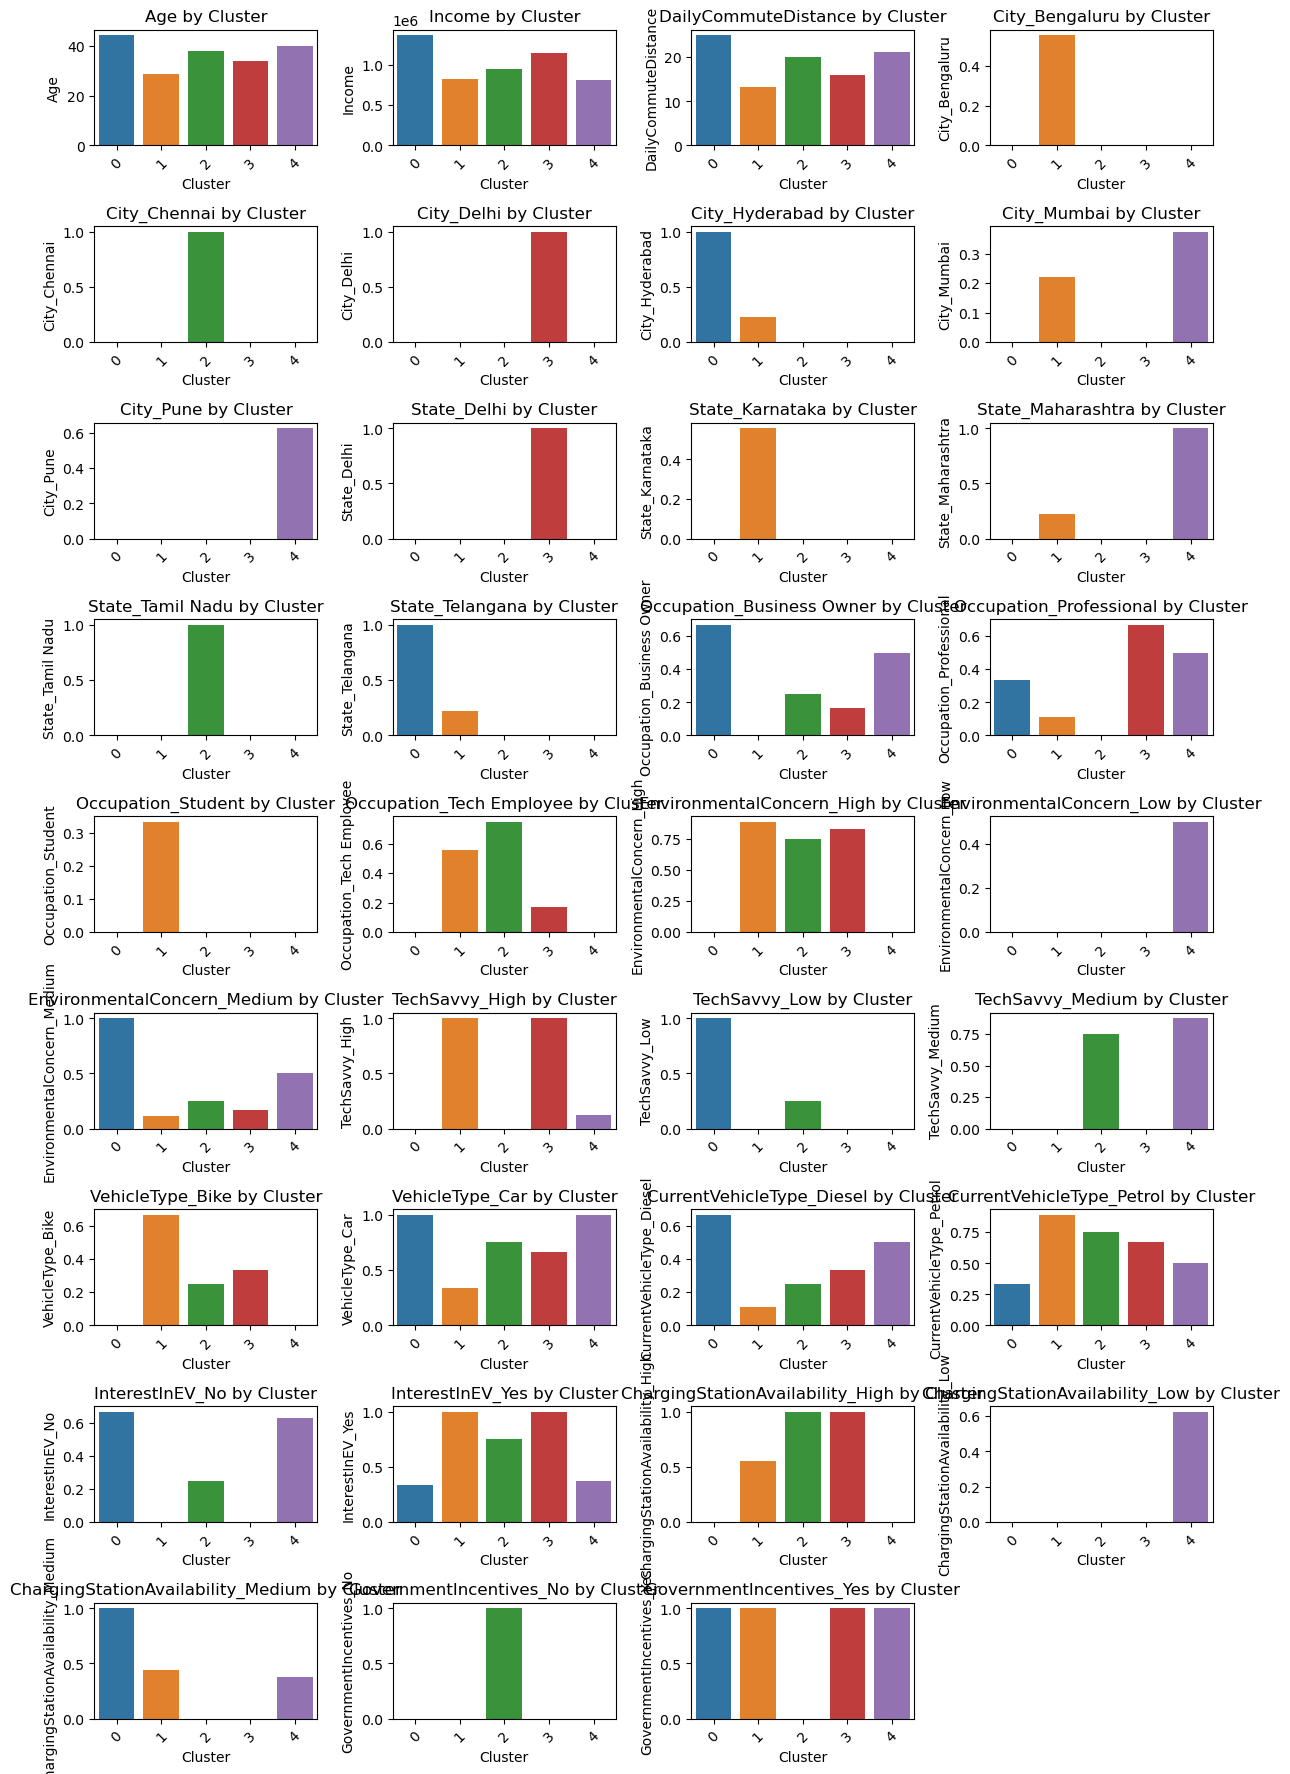

In [22]:
 # Visualize cluster profiles
cluster_profiles = data.groupby('Cluster').mean().reset_index()
num_columns = len(X.columns)
num_rows = (num_columns + 3) // 4  # Calculate the number of rows needed for subplot layout

plt.figure(figsize=(12, 2 * num_rows))
for i, column in enumerate(X.columns):
    plt.subplot(num_rows, 4, i + 1)
    sns.barplot(x='Cluster', y=column, data=cluster_profiles)
    plt.title(f'{column} by Cluster')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


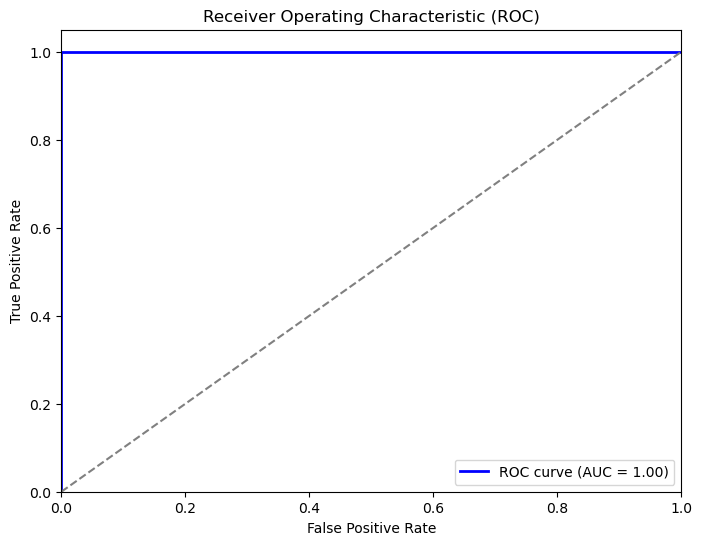

In [23]:
# Visualize ROC curve
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


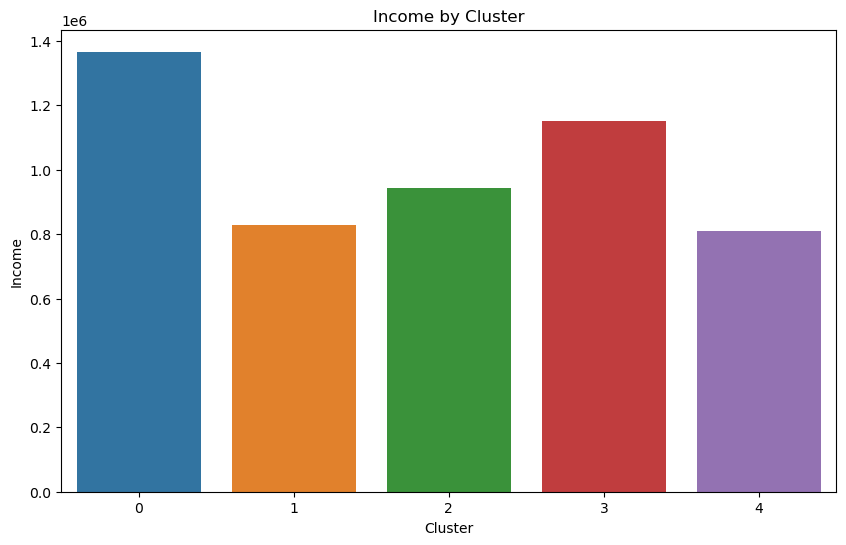

In [24]:
# Visualize recommendations based on cluster profiles
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Income', data=cluster_profiles)
plt.title('Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()

# 

